In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import string
from nltk.corpus import stopwords
import matplotlib.dates as mdates
# Import the langdetect library
from langdetect import detect
import numpy as np
import re
import matplotlib.font_manager as fm


In [3]:


# Replace 'file.csv' with the path to your CSV file
df = pd.read_csv('Master_Dataset_Raw_copy.csv')
# Sort the DataFrame by the datetime column in ascending order
df_sorted = df.sort_values(by='Account Created Date')

# Print the sorted DataFrame
df_sorted

# set the display option to show the full text in a column
pd.set_option('display.max_colwidth', 150)


#df_sorted.head(20)

,Story Primary ID,Story ID,User Primary ID,User ID,Gender,Age,Title,Narrative,Media,Account Created Date,Interest
30965,124496,STY1660157368,14832,USR1641020470,female,24,"""Remember George, no man is a failure who has friends.""\n --""It's a Wonderful Life""",(Favorite on-screen Bffs)\nPop-culture time and again has given many legendary friendships to look up to. May it be the classic like Frodo and Sam...,https://image.pixstory.com/Pixstory-image-166015568856937.png,01-01-2022 12:31,"friendshipday'22, friendshipday22"
30039,125429,STY1660360677,14835,USR1641023505,NaN,47,On-screen Bffs,Glad to read this.,https://image.pixstory.com/Pixstory-image-166015568856937.png,01-01-2022 13:21,friendshipday
30121,125347,STY1660325731,14837,USR1641025987,NaN,20,Panchayat one of my fav show,Loved the friendship on the show,https://image.pixstory.com/Pixstory-image-166015568856937.png,01-01-2022 14:03,friendshipday22
28778,126765,STY1660496512,14846,USR1641042530,NaN,23,On-screen friendships,Indian show Panchayat.,https://image.pixstory.com/Pixstory-image-166015568856937.png,01-01-2022 18:38,friendshipday22
28772,126771,STY1660496705,14847,USR1641042672,NaN,17,Shared from Adya U Routray,Friendshipday'22,https://image.pixstory.com/Pixstory-image-166015568856937.png,01-01-2022 18:41,"friendshipday22, friendshipday'22"
28706,126837,STY1660501734,14854,USR1641057672,NaN,56,Glad to read,Best On-screen friendship: Webseries Panchayat,https://image.pixstory.com/Pixstory-image-166015568856937.png,01-01-2022 22:51,"friendshipday, friendshipday'22"
29353,126145,STY1660453569,14855,USR1641059130,NaN,22,The friendship and bonding on the show Panchayat,My favourite Indian Series\nShared from Adya U Routray,https://image.pixstory.com/Pixstory-image-166015568856937.png,01-01-2022 23:15,friends
27562,128034,STY1660720626,448,USR1612177534,male,69,For once low AQI,Delhi is having clear blue skies because of frequency of rains. Wish such Fresh air was to persist through the year.,https://image.pixstory.com/Pixstory-image-166072050483716.png,01-02-2021 16:35,climate
26732,128918,STY1660829617,448,USR1612177534,male,69,Gulzar,"Today is Gulzar’s birthday. \nSampooran Singh Kalra, or popularly known Gulzar started his career as a motor mechanic but Caught eye of Shailendra...",https://image.pixstory.com/Pixstory-image-166082951678483.jpeg,01-02-2021 16:35,movies
29044,126482,STY1660480902,448,USR1612177534,male,69,Sheaffer Comes to India,India must be the largest user of Fountain Pens even now. Fitting that An Indian company bought out the iconic brand,https://image.pixstory.com/Pixstory-image-166048077621966.jpeg,01-02-2021 16:35,financial


In [6]:

df_sorted["Date"] = pd.to_datetime(df_sorted["Account Created Date"]).dt.date

# Count the number of unique dates in the 'date' column
num_unique_dates = df_sorted['Date'].nunique()

print('Number of unique dates:', num_unique_dates)


Number of unique dates: 511


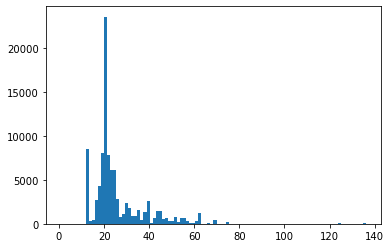

In [9]:
# create a histogram of one of the columns

plt.hist(df['Age'], bins=100)
plt.show()

# Top Interests from Pixstory

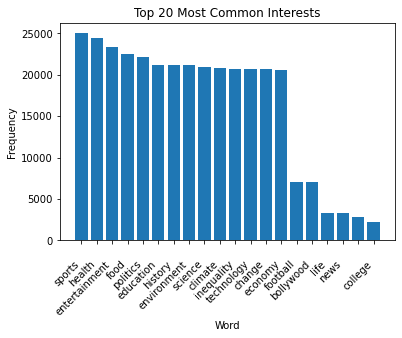

In [25]:

text = df['Interest'].str.cat(sep=' ')


# Convert the text to lowercase and split it into words
words = text.lower().split()

# Define the set of punctuation marks to exclude from the words
exclude = set(string.punctuation)

# Define the stop words to exclude from the frequency counter
stop_words = ['the', 'is', 'not', 'so', 'after', 'all']

# Remove the stop words from the list of words
words = [word for word in words if word not in stop_words]

# Remove the punctuation marks from each word
words = [''.join(ch for ch in word if ch not in exclude) for word in words]

# Calculate the frequencies of each word and keep the top 10
top_words = Counter(words).most_common(20)

# Extract the word and frequency values into separate lists
word_values = [pair[0] for pair in top_words]
frequency_values = [pair[1] for pair in top_words]

# Create a histogram of the word frequencies
fig, ax = plt.subplots()
ax.bar(word_values, frequency_values, align='center')
ax.set_xticks(word_values)
ax.set_xticklabels(word_values, rotation=45, ha='right')
ax.tick_params(axis='x', which='major', pad=15)
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
ax.set_title('Top 20 Most Common Interests')
plt.show()

# Top word Pairs given interests

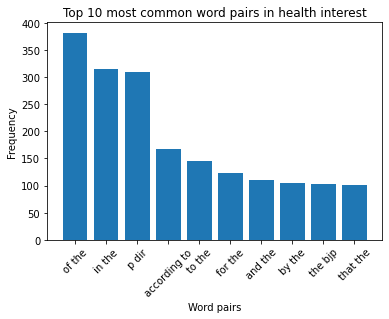

In [43]:


# filter for rows containing the word "India" in the Interest column
india_df = df[df['Interest'].str.contains("politics")]

# create a list of all 2-word strings in the Title column
title_words = []
for title in india_df['Narrative']:
    title_words.extend([word for word in re.findall(r'\b\w+\s\w+\b', title.lower())])

# count the frequency of each 2-word string
title_counts = Counter(title_words)

# get the top 10 most common 2-word strings
top_words = title_counts.most_common(10)

# create lists of the words and their counts
word_list = [word[0] for word in top_words]
count_list = [word[1] for word in top_words]

# create a bar chart of the word counts
plt.bar(word_list, count_list)

# add labels and title
plt.xlabel('Word pairs')
plt.ylabel('Frequency')
plt.title('Top 10 most common word pairs in health interest')

# rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)
# show the plot
plt.show()



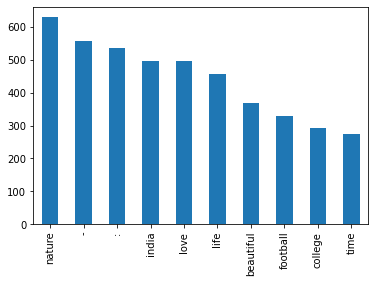

In [8]:

# Filter the data to only include rows where "sports" appears in column y
sports_df = df[df['Interest'].str.contains('sports', case=False)]


# Combine all of the text in column x into a single string
text = ' '.join(sports_df['Title'].tolist())

# Convert the text to lowercase and split it into words
words = text.lower().split()


# Define the stop words to exclude from the frequency counter
stop_words = ['the', 'is', 'not', 'so', 'after', 'all', 'of', 'to', 'in', 'a', 'i', 'my', 'with', 'at', 'for', 'and', 'on', 'you', 'this','are','from','as', 'be', 'it','new','by','sports', 'your','will','day','that','what','has','good','how','world','cup','can','we','2022','an','have','was','best','about','his','one','le','first']

# Remove the stop words from the list of words
words = [word for word in words if word not in stop_words]

# Split the text into individual words and count the frequency of each word
word_counts = pd.Series(words).value_counts()

# Plot the top ten most frequent words
word_counts.head(10).plot(kind='bar')
plt.show()





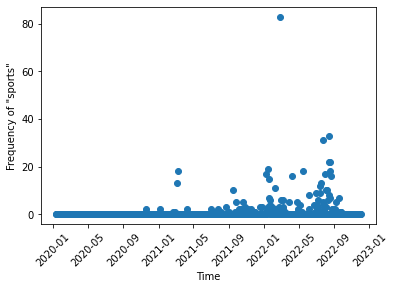

In [4]:
# Convert the "time" column to a datetime format
df['Account Created Date'] = pd.to_datetime(df['Account Created Date'])

# Group the data by time intervals and count the frequency of the word "sports"
freq_df = df[df['Interest'].str.contains('sports', case=False)].groupby(pd.Grouper(key='Account Created Date', freq='D')).apply(lambda x: x['Interest'].str.count('sports').sum())

# Create a plot of the frequency of the word "sports" over time
fig, ax = plt.subplots()
ax.scatter(freq_df.index, freq_df.values)
ax.set_xlabel('Time')
ax.set_ylabel('Frequency of "sports"')


# Rotate the x-axis tick labels
plt.xticks(rotation=45)

plt.show()

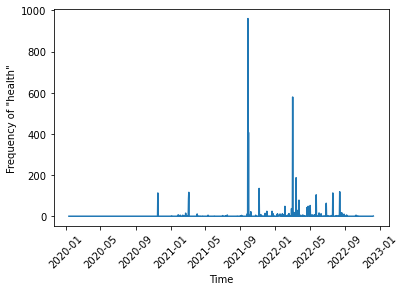

In [55]:
# Convert the "time" column to a datetime format
df['Account Created Date'] = pd.to_datetime(df['Account Created Date'])

# Group the data by time intervals and count the frequency of the word "sports"
freq_df = df[df['Interest'].str.contains('health', case=False)].groupby(pd.Grouper(key='Account Created Date', freq='D')).apply(lambda x: x['Interest'].str.count('health').sum())

# Create a plot of the frequency of the word "sports" over time
fig, ax = plt.subplots()
ax.plot(freq_df.index, freq_df.values)
ax.set_xlabel('Time')
ax.set_ylabel('Frequency of "health"')


# Rotate the x-axis tick labels
plt.xticks(rotation=45)

plt.show()

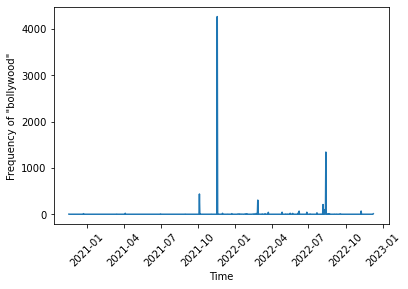

In [102]:
# Convert the "time" column to a datetime format
df['Account Created Date'] = pd.to_datetime(df['Account Created Date'])

# Group the data by time intervals and count the frequency of the word "sports"
freq_df = df[df['Interest'].str.contains('bollywood', case=False)].groupby(pd.Grouper(key='Account Created Date', freq='D')).apply(lambda x: x['Interest'].str.count('bollywood').sum())

# Create a plot of the frequency of the word "sports" over time
fig, ax = plt.subplots()
ax.plot(freq_df.index, freq_df.values)
ax.set_xlabel('Time')
ax.set_ylabel('Frequency of "bollywood"')


# Rotate the x-axis tick labels
plt.xticks(rotation=45)

plt.show()

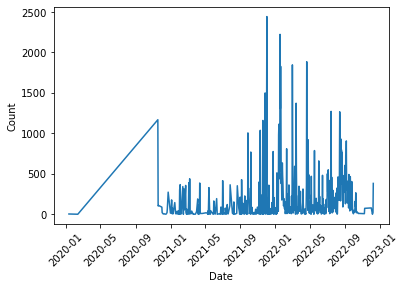

In [100]:
# convert datetime column to just show the date and assign to 'date' column
df['date'] = pd.to_datetime(df['Account Created Date']).dt.date

# sort by increasing date
df_sorted = df.sort_values('date')

# create new data frame with unique dates and count of occurrences
df2 = df_sorted.groupby('date').size().reset_index(name='count')

# print result
df2

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot date vs count as a line graph
ax.plot(df2['date'], df2['count'])

# Set x-axis label and rotate tick labels
ax.set_xlabel('Date')
plt.xticks(rotation=45)

# Set y-axis label
ax.set_ylabel('Count')

# Show the plot
plt.show()


